In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
#import my_library as ml
import sklearn
import sklearn.ensemble
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
from scipy import arange
import sklearn
import scipy
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
import keras
from keras import optimizers
from keras import initializers


In [41]:
df=pd.read_csv("C:\\application_info.csv",header=0,sep=',')
df=df[df.sample_cd !="test"]
tr=pd.read_csv("C:\\default_flg.csv",header=0,sep=',')
df["target"]=tr.default_flg
del df["id"]
df.head()

,application_dt,sample_cd,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,target
0,01JAN2014,train,SCH,M,27,Y,Y,0,0,-1.917831,0,40,2,3,32000,1,4,N,0
1,01JAN2014,train,GRD,F,26,N,N,0,0,-1.153144,2,60,2,3,50000,2,1,N,0
2,01JAN2014,train,SCH,M,35,N,N,0,1,-1.732810,0,40,1,2,20000,4,3,N,0
3,01JAN2014,train,GRD,F,35,N,N,0,1,-2.552133,2,20,2,3,80000,1,3,N,0
4,01JAN2014,train,UGR,F,24,N,N,0,0,-1.914581,1,50,2,3,27000,1,2,N,0


In [30]:

#pd.to_datetime(df.application_dt);

In [31]:

del df["application_dt"]
del df["sample_cd"]
df.dropna(inplace=True)

In [32]:
from keras.activations import K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives)
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives)
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall))

In [33]:
target=df.target
#del df["target"]

In [34]:
df.head()

,education_cd,gender_cd,age,car_own_flg,car_type_flg,appl_rej_cnt,good_work_flg,Score_bki,out_request_cnt,region_rating,home_address_cd,work_address_cd,income,SNA,first_time_cd,Air_flg,target
0,1.0,1,27,1,1,0,0,-1.917831,0,4,2,3,320.0,1,4,0,0
1,2.0,0,26,0,0,0,0,-1.153144,2,6,2,3,500.0,2,1,0,0
2,1.0,1,35,0,0,0,1,-1.732810,0,4,1,2,200.0,4,3,0,0
3,2.0,0,35,0,0,0,1,-2.552133,2,2,2,3,800.0,1,3,0,0
4,3.0,0,24,0,0,0,0,-1.914581,1,5,2,3,270.0,1,2,0,0


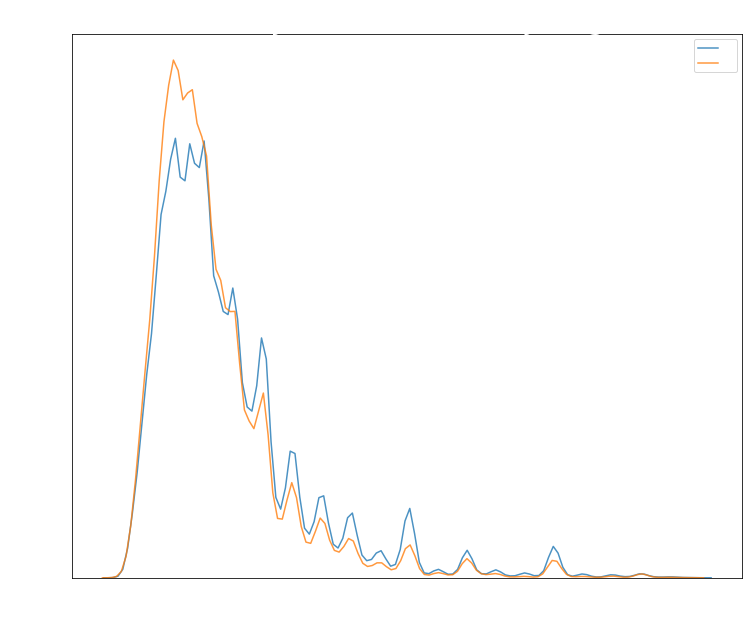

In [39]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

types = df[df.income<2000].target.value_counts()
types = list(types.index)
from IPython.core.pylabtools import figsize
# Plot of distribution of scores for building categories
figsize(12, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = df[(df['target'] == b_type) & (df["income"]<2000)]
    
    # Density plot of Energy Star Scores
    sns.kdeplot(subset['income'].dropna(),
               label = b_type, shade = False, alpha = 0.8);
    
# label the plot
plt.xlabel('income', size = 20); plt.ylabel('Density', size = 20); 
plt.title('Density Plot of income by target', size = 28);

In [ ]:
df.education_cd=df.education_cd.map({"SCH":1,"GRD":2,"UGR":3,"PGR":4,"ACD":5})
df.car_own_flg=df.car_own_flg.map({"Y":1,"N":0})
df.car_type_flg=df.car_type_flg.map({"Y":1,"N":0})
df.region_rating=df.region_rating.apply(lambda x:int(x/10))
df.Air_flg=df.Air_flg.map({"Y":1,"N":0})
df.gender_cd=df.gender_cd.map({"M":1,"F":0})
df.income=df.income.apply(lambda x:x/100)

In [ ]:
inputs_train, inputs_test, expected_output_train, expected_output_test = \
train_test_split(MinMax, target, test_size = 0.33, random_state = 12345)

In [ ]:
# param_grid={'max_depth':range(4,5),"learning_rate":[0.1],"n_estimators":range(400,500,100)}
# RF=sklearn.model_selection.GridSearchCV(sklearn.ensemble.GradientBoostingClassifier(),\
#                                         param_grid=param_grid,n_jobs=1,cv=3,scoring=sklearn.metrics.make_scorer\
#                                        (sklearn.metrics.recall_score));
# RF.fit(inputs_train,expected_output_train);
# print("Наилучшее значение правильности перекр проверки: {:.2f}".format(RF.best_score_))
# print("Наилучшие параметры: {}".format(RF.best_params_))

In [ ]:
#inputs_train=inputs_train.values
#expected_output_train=expected_output_train.values
MinMax=sklearn.preprocessing.minmax_scale(df)

In [ ]:
plot_data = df[df.columns[4]]
plot_data=plot_data[:10000]

# Replace the inf with nan
#plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
#plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
#                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
#                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Create the pairgrid object
grid = sns.PairGrid(data = df, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'red', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'red', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func);
grid.map_lower(sns.kdeplot, cmap = plt.cm.Reds)

# Title for entire plot
plt.suptitle('Pairs Plot of Energy Data', size = 36, y = 1.02);

In [ ]:
random_state=123456
for i in range(1,2):
    print('counter='+str(i))
    for lr in  [0.0001]:
        for momentum in arange(0.8,0.9,0.1):
            for epochs in [500]:
                for optimazer in [1]:
            #     random_state=3*2**counter
                    tn_2 = initializers.RandomNormal(seed=random_state,stddev=0.1)
                    tn_3 = initializers.RandomNormal(seed=random_state,stddev=0.1)
                    tn_4 = initializers.RandomNormal(seed=random_state,stddev=0.1)
                    init_3 = initializers.Constant(value = 1e-3)
                    init_4 = initializers.Constant(value = 1e-3)
                    init_5 = initializers.Constant(value = 1e-3)
                    model3 = Sequential()
                    model3.add(Dense(13, input_dim=16, activation='relu', kernel_initializer=tn_2, bias_initializer=init_3))
                    model3.add(Dense(10, activation='relu', kernel_initializer=tn_2, bias_initializer=init_3))
                    model3.add(Dense(1, activation='sigmoid', kernel_initializer=tn_4, bias_initializer=init_5))

                    sgd2 = optimizers.Adam()
                    model3.compile(loss='binary_crossentropy', optimizer=sgd2, metrics=[f1])

                    #  model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
                    # Training a model
                    model3.fit(inputs_train, expected_output_train, epochs=epochs, batch_size=50);
                    
    

In [ ]:
model3.predict_classes(inputs_train)
#print("Правильность на тестовом наборе: {:.2f}".format(RF.score(inputs_test, expected_output_test)*100))

In [ ]:
print(sklearn.metrics.classification_report(expected_output_train,model3.predict_classes(inputs_train)))

In [ ]:
sklearn.metrics.confusion_matrix(expected_output_train,model3.predict_classes(inputs_train))